In [14]:
import pandas as pd


# 检测正确性，长度以及深度

In [4]:
from anbn import *
name = "Anbn"
obj = anbn
file_name = list(map(lambda x: name + x, ["_train", "_test1", "_test2", "_test3", "_test4"]))
length = [(0,32), (0, 32), (32, 64), (64, 128), (128, 256)]
count = 0
lenw_count = 0

for file, l in zip(file_name, length):
    data = pd.read_csv(file, header=None, index_col=None)
    feature = data[0].values.tolist()
    label = data[1].values.tolist()
    for f, lab in zip(feature, label):
        lenf = f.find("e") + 1
        if lenf <= l[0] or lenf > l[1]:
            lenw_count += 1
        rlabel, _ = obj.accept(f[1: f.find("e")])
        rlabel = "0" + rlabel + rlabel[-1] * (l[1] - len(rlabel) - 1)
        if rlabel != lab:
            count += 1
    print(file, count, lenw_count)

Anbn 11925 8969 3439 1098
Anbn_train 0 0
Anbn_test1 0 0
Anbn_test2 0 0
Anbn_test3 0 0
Anbn_test4 0 0


In [6]:
from Anbncn import *
name = "Anbncn"
obj = anbncn
file_name = list(map(lambda x: name + x, ["_train", "_test1", "_test2", "_test3", "_test4"]))
length = [(0,32), (0, 32), (32, 64), (64, 128), (128, 256)]
count = 0
lenw_count = 0

for file, l in zip(file_name, length):
    data = pd.read_csv(file, header=None, index_col=None)
    feature = data[0].values.tolist()
    label = data[1].values.tolist()
    for f, lab in zip(feature, label):
        lenf = f.find("e") + 1
        if lenf <= l[0] or lenf > l[1]:
            lenw_count += 1
        rlabel, _ = obj.accept(f[1: f.find("e")])
        rlabel = "0" + rlabel + rlabel[-1] * (l[1] - len(rlabel) - 1)
        if rlabel != lab:
            count += 1
    print(file, count, lenw_count)

Anbncn_train 0 0
Anbncn_test1 0 0
Anbncn_test2 0 0
Anbncn_test3 0 0
Anbncn_test4 0 0


In [11]:
length = [(0,32), (0, 32), (32, 256), (32, 256), (256, 512)]
depth = [(0, 8), (8, 16), (16, 32), (32, 10000)]
from Dyck1 import *
name = "Dyck1"
obj = d1
file_name = list(map(lambda x: name + x, ["_train", "_test1", "_test2", "_test3", "_test4"]))
count = 0
deplenw_count = 0
for file, l in zip(file_name, length):
    data = pd.read_csv(file, header=None, index_col=None)
    feature = data[0].values.tolist()
    label = data[1].values.tolist()
    for f, lab, dep in zip(feature, label, depth):
        rlabel, _, fdep = obj.accept(f[1: f.find("e")])
        if fdep <= dep[0] or fdep > dep[1] or (len(rlabel) + 2) > l[1]:
            deplenw_count += 1
        rlabel = "0" + rlabel + rlabel[-1] * (l[1] - len(rlabel) - 1)
        if rlabel != lab:
            count += 1
    print(file, count, lenw_count)

Dyck1_train 0 0
Dyck1_test1 0 0
Dyck1_test2 0 0
Dyck1_test3 0 0
Dyck1_test4 0 0


# 检测测试集1不出现在训练集

In [12]:
from Dyck1 import *
name = "Dyck1"
obj = d1
trainfile = name + "_train"
test1file = name + "_test1"
count = 0

In [13]:
traindf = pd.read_csv(trainfile, header=None, index_col=None)
trainl = [(i[0], i[1]) for i in traindf.values.tolist()]
test1df = pd.read_csv(test1file, header=None, index_col=None)
test1l = [(i[0], i[1]) for i in test1df.values.tolist()]

In [14]:
count = 0
for s in test1l:
    if s in trainl:
        count += 1
print(count)

0


# 数据平衡问题(正负，多对多正负，长度，深度）

In [54]:
from Dyck1 import *
obj = d1
name = "Dyck1"

In [55]:
depthl = list()
lengthl = list()
pnl = list()
multipnl = list()
traindf = pd.read_csv(name + "_train", header=None, index_col=None)
trainl = traindf.values.tolist()
for f, l in trainl:
    length = f.find("e") + 1
    _, _, depth = obj.accept(f[1: (length -1)])
    pn = 0 if l[-1] == "0" else 1
    multipn = list(l)
    lengthl.append(length)
    depthl.append(depth)
    pnl.append(pn)
    multipnl.extend(multipn)


In [56]:
import matplotlib.pyplot as plt
from collections import defaultdict


<BarContainer object of 8 artists>

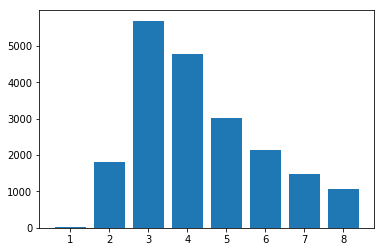

In [57]:
obj = depthl
objd = defaultdict(lambda : 0)
for i in obj:
    objd[i] += 1

plt.bar(objd.keys(), objd.values())

<BarContainer object of 30 artists>

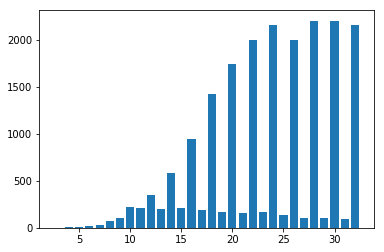

In [58]:
obj = lengthl
objd = defaultdict(lambda : 0)
for i in obj:
    objd[i] += 1

plt.bar(objd.keys(), objd.values())

<BarContainer object of 2 artists>

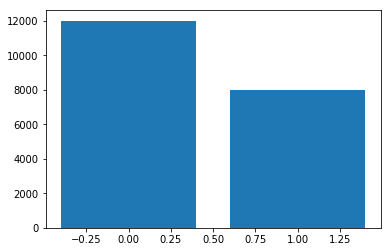

In [59]:
obj = pnl
objd = defaultdict(lambda : 0)
for i in obj:
    objd[i] += 1

plt.bar(objd.keys(), objd.values())

<BarContainer object of 2 artists>

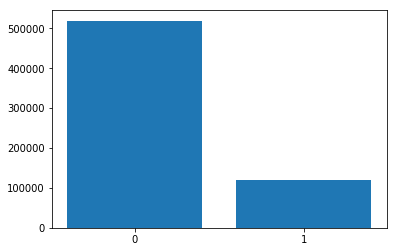

In [60]:
obj = multipnl
objd = defaultdict(lambda : 0)
for i in obj:
    objd[i] += 1

plt.bar(objd.keys(), objd.values())

In [63]:
objd['0'] / sum(objd.values())

0.8109984375

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/countlanguage/Anbn_train", header=None, index_col=None)

In [4]:
value = df[1].values.tolist()
d = {"0": 0, "1": 0}

In [5]:
for s in value:
    for c in s:
        d[c] += 1

In [6]:
d["0"] / sum(d.values())

0.7927203125